In [0]:
%sql
USE CATALOG workspace;
USE SCHEMA default;

Prüfen der Daten im Volume

In [0]:
%python
dataset_school = "/Volumes/workspace/default/volume"

all_files = dbutils.fs.ls(dataset_school)
json_files = [f for f in all_files if f.name.endswith(".json")]

display(all_files)
display(json_files)

path,name,size,modificationTime
dbfs:/Volumes/workspace/default/volume/courses.json,courses.json,329,1757583402000
dbfs:/Volumes/workspace/default/volume/enrollments.json,enrollments.json,371,1757583402000
dbfs:/Volumes/workspace/default/volume/image.png,image.png,77222,1757583402000
dbfs:/Volumes/workspace/default/volume/nested_json.json,nested_json.json,1186,1757583402000
dbfs:/Volumes/workspace/default/volume/sample_data.csv,sample_data.csv,69,1757583402000
dbfs:/Volumes/workspace/default/volume/sample_data2.csv,sample_data2.csv,75,1757583402000
dbfs:/Volumes/workspace/default/volume/students.json,students.json,322,1757583402000
dbfs:/Volumes/workspace/default/volume/students_update.json,students_update.json,216,1757583402000


path,name,size,modificationTime
dbfs:/Volumes/workspace/default/volume/courses.json,courses.json,329,1757583402000
dbfs:/Volumes/workspace/default/volume/enrollments.json,enrollments.json,371,1757583402000
dbfs:/Volumes/workspace/default/volume/nested_json.json,nested_json.json,1186,1757583402000
dbfs:/Volumes/workspace/default/volume/students.json,students.json,322,1757583402000
dbfs:/Volumes/workspace/default/volume/students_update.json,students_update.json,216,1757583402000


Querying JSON Data

In [0]:
%sql
-- Students
/*
SELECT * FROM json.`/FileStore/tables/school_data/students.json`; -- In der Free-Edition nicht verfügbar
*/

In [0]:
# Alternative:
students_df = spark.read.json("/Volumes/workspace/default/volume/students.json")
students_df.createOrReplaceTempView("students")

courses_df = spark.read.json("/Volumes/workspace/default/volume/courses.json")
courses_df.createOrReplaceTempView("courses")

enrollments_df = spark.read.json("/Volumes/workspace/default/volume/enrollments.json")
enrollments_df.createOrReplaceTempView("enrollments")

In [0]:
%sql
SELECT * FROM students;

email,gpa,profile,student_id,updated
anna@example.com,3.9,full-time,1,2025-08-01
ben@example.com,3.2,part-time,2,2025-08-03
clara@example.com,3.7,exchange,3,2025-08-06


In [0]:
%sql
SELECT * FROM courses;

category,course_id,instructor,price,title
Technology,101,Dr. Smith,850,Data Engineering
AI,102,Dr. Lee,1200,Machine Learning
Philosophy,103,Dr. Kim,600,Ethics in AI


In [0]:
%sql
SELECT * FROM enrollments;

courses,enroll_id,quantity,student_id,timestamp,total
List(101),e001,1,1,2025-08-01T09:00:00,850
"List(102, 103)",e002,2,2,2025-08-02T10:00:00,1800
List(103),e003,1,3,2025-08-03T11:30:00,600


Unstrukturierte Daten

In [0]:
image_path = "/Volumes/workspace/default/volume/*.png" 

df = spark.read.format("binaryFile").load(image_path)
display(df)

path modificationTime length content dbfs:/Volumes/workspace/default/volume/image.png 2025-09-11T09:36:42.000Z 77222 iVBORw0KGgoAAAANSUhEUgAAAlEAAAESCAYAAADdWICBAAAKrmlDQ1BJQ0MgUHJvZmlsZQAASImVlwdQU+kWgP9700NCSwgdQm+CdAJICT0U6dVGSAKEEmIgNDuyuAIriogIKgsWRBRcCyBrRRTboqCAfUFEQVkXC6JieRcYwu6+ee/NOzPnnm/OPf/5z3/m/jPnAkCms4XCFFgWgFRBhijE240eFR1Dx40CPMABMlAFVDYnXcgMCvIHiMzZv8uHPgBN2zum07n+/f1/FTkuL50DABSEcBw3nZOK8ElEP3OEogwAUMcQv05WhnCa7yJMFSEFIjwyzQmz/GWa42YYLTsTExbijrAuAHgSmy1KAIBkjvjpmZwEJA9pei9zAZcvQHg9ws6pqWlchC8gbIjECBGezs+I+0uehL/ljJPkZLMTJDx7lhnBe/DThSnsnP+zHf9bUlPEc3sYIEpKFPmEIJaG9OxZcpqfhAVxiwPnmM+diZ/hRLFP+Bxz0t1j5jg9JZQ1x1y2h58kT8pi/zmO53tJYvgZrLA55qV7hs6xKC1Esm+8yJ05x2zRfA3i5HCJP5HHkuTPTQyLnONMfsRiSW3JoX7zMe4Sv0gcIjkLT+DtNr+vl6QPqel/OTufJVmbkRjmI+kDe75+noA5nzM9SlIbl+fhOR8TLokXZrhJ9hKmBEnieSneEn96ZqhkbQbycc6vDZL0MIntGzTHIAj4AH9AB5bABjCAG7AFwQCpKoOXnTF9GPc0YY6In5CYQWciN45HZwk4ZgvoluaWNgBM39/Zz+PdvZl7CdHw87602wDY1SNQN+9jxwLQinRJQWfep3cAAJlnAJzlcMSizFkfevqBAUQgA6hAGWgAHWAITJEabYEjcAWewBcEgjAQDZYDDkgEqUAEssBqsAEUgCKwFewAlaAa7AOHwFFwHLSAM+AiuAJugNugFzwEA2AYvALj4AOYgiAIB5EhCqQMaUJ6kAlkCTEgZ8gT8odCoGgoFkqABJAYWg1thIqgUqgSqoHqoV+g09BF6BrUDd2HBqFR6C30GUbBJJgKq8P68EKYATNhPzgMXgYnwCvhXDgf3gJXwLXwEbgZvgjfgHvhAfgVPIECKCkUDaWFMkUxUO6oQFQMKh4lQq1FFaLKUbWoRlQbqhN1BzWAGkN9QmPRFDQdbYp2RPugw9Ec9Er0WnQxuhJ9CN2M7kDfQQ+ix9HfMGSMGsYE44BhYaIwCZgsTAGmHHMQcwpzGdOLGcZ8wGKxNKwB1g7rg43GJmFXYYuxe7BN2AvYbuwQdgKHwynjTHBOuEAcG5eBK8Dtwh3Bncf14IZxH/FSeE28Jd4LH4MX4PPw5fjD+HP4HvwL/BRBlqBHcCAEEriEHEIJYT+hjXCLMEyYIsoRDYhOxDBiEnEDsYLYSLxMfER8JyUlpS1lLxUsxZdaL1UhdUzqqtSg1CeSPMmY5E5aShKTtpDqSBdI90nvyGSyPtmVHEPOIG8h15MvkZ+QP0pTpM2kWdJc6XXSVdLN0j3Sr2UIMnoyTJnlMrky5TInZG7JjMkSZPVl3WXZsmtlq2RPy/bLTshR5CzkAuVS5YrlDstdkxuRx8nry3vKc+Xz5ffJX5IfoqAoOhR3CoeykbKfcpkyTMVSDagsahK1iHqU2kUdV5BXsFaIUMhWqFI4qzBAQ9H0aSxaCq2EdpzWR/usqK7IVOQpblZsVOxRnFRSVXJV4ikVKjUp9Sp9VqYreyonK29TblF+rIJWMVYJVslS2atyWWVMlarqqMpRLVQ9rvpADVYzVgtRW6W2T+2m2oS6hrq3ulB9l/ol9TENmoarRpJGmcY5jVFNiqazJl+zTPO85ku6Ap1JT6FX0Dvo41pqWj5aYq0arS6tKW0D7XDtPO0m7cc6RB2GTrxOmU67zriupm6A7mrdBt0HegQ9hl6i3k69Tr1JfQP9SP1N+i36IwZKBiyDXIMGg0eGZEMXw5WGtYZ3jbBGDKNkoz1Gt41hYxvjROMq41smsImtCd9kj0n3AswC+wWCBbUL+k1JpkzTTNMG00Ezmpm/WZ5Zi9nrhboLYxZuW9i58Ju5jXmK+X7zhxbyFr4WeRZtFm8tjS05llWWd63IVl5W66xard5Ym1jzrPda37Oh2ATYbLJpt/lqa2crsm20HbXTtYu1223Xz6AyghjFjKv2GHs3+3X2Z+w/Odg6ZDgcd/jT0dQx2fGw48gig0W8RfsXDTlpO7GdapwGnOnOsc4/Ow+4aLmwXWpdnrrquHJdD7q+YBoxk5hHmK/dzN1EbqfcJt0d3Ne4X/BAeXh7FHp0ecp7hntWej7x0vZK8GrwGve28V7lfcEH4+Pns82nn6XO4rDqWeO+dr5rfDv8SH6hfpV+T/2N/UX+bQFwgG/A9oBHi/UWCxa3BIJAVuD2wMdBBkErg34NxgYHBVcFPw+xCFkd0hlKCV0Rejj0Q5hbWEnYw3DDcHF4e4RMxNKI+ojJSI/I0siBqIVRa6JuRKtE86NbY3AxETEHYyaWeC7ZsWR4qc3SgqV9ywyWZS+7tlxlecrysytkVrBXnIjFxEbGHo79wg5k17In4lhxu+PGOe6cnZxXXFduGXeU58Qr5b2Id4ovjR9JcErYnjCa6JJYnjjGd+dX8t8k+SRVJ00mBybXJX9PiUxpSsWnxqaeFsgLkgUdaRpp2WndQhNhgXBgpcPKHSvHRX6ig+lQ+rL01gwqMijdFBuKfxAPZjpnVmV+zIrIOpEtly3IvpljnLM550WuV+6BVehVnFXtq7VWb1g9uIa5pmYttDZubfs6nXX564bXe68/tIG4IXnDb3nmeaV57zdGbmzLV89fnz/0g/cPDQXSBaKC/k2Om6p/RP/I/7Frs9XmXZu/FXILrxeZF5UXfSnmFF//yeKnip++b4nf0lViW7J3K3arYGvfNpdth0rlSnNLh7YHbG8uo5cVlr3fsWLHtXLr8uqdxJ3inQMV/hWtu3R3bd31pTKxsrfKrappt9ruzbsn93D39Ox13dtYrV5dVP35Z/7P92q8a5pr9WvL92H3Ze57vj9if+cBxoH6gyoHiw5+rRPUDRwKOdRRb1dff1jtcEkD3CBuGD2y9Mjtox5HWxtNG2uaaE1Fx8Ax8bGXv8T+0nfc73j7CcaJxpN6J3efopwqbIaac5rHWxJbBlqjW7tP+55ub3NsO/Wr2a91Z7TOVJ1VOFtyjngu/9z387nnJy4IL4xdTLg41L6i/eGlqEt3O4I7ui77Xb56xevKpU5m5/mrTlfPXHO4dvo643rLDdsbzTdtbp76zea3U122Xc237G613ra/3da9qPtcj0vPxTsed67cZd290bu4t7svvO9e/9L+gXvceyP3U+6/eZD5YOrh+keYR4WPZR+XP1F7Uvu70e9NA7YDZwc9Bm8+DX36cIgz9OpZ+rMvw/nPyc/LX2i+qB+xHDkz6jV6++WSl8OvhK+mxgr+kPtj92vD1yf/dP3z5njU+PAb0Zvvb4vfKb+re2/9vn0iaOLJh9QPU5OFH5U/HvrE+NT5OfLzi6msL7gvFV+NvrZ98/v26Hvq9+9Ctog9MwqgEIXj4wF4WwcAORoACjJXEJfMztczAs3+E8wQ+E88O4PPiC0A9a5gesgBAYjdg1h9xMogGoRomCuArawkOjcLz8zt08IkISP3BACyWX3t9uCfMjvT/6Xuf1ogyfo3+y9EUwhDqFwupAAAAFZlWElmTU0AKgAAAAgAAYdpAAQAAAABAAAAGgAAAAAAA5KGAAcAAAASAAAARKACAAQAAAABAAACUaADAAQAAAABAAABEgAAAABBU0NJSQAAAFNjcmVlbnNob3SBLEnhAAAB1mlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPHg6eG1

In [0]:
from PIL import Image
import io

# Laden mit binaryFile
image_path = "/Volumes/workspace/default/volume/image.png"
df_bin = spark.read.format("binaryFile").load(image_path)

# Inhalte extrahieren
binary_content = df_bin.select("content").first()[0]
image = Image.open(io.BytesIO(binary_content))
width, height = image.size

# DataFrame mit Metadaten erzeugen
df_meta = spark.createDataFrame(
    [(image_path, width, height)],
    ["origin", "width", "height"]
)
df_meta.createOrReplaceTempView("image_view")

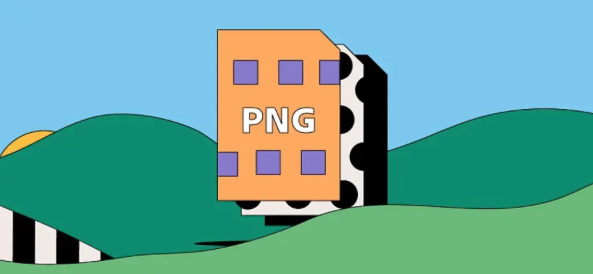

In [0]:
# Zeige Bild im Notebook
image.show()

In [0]:
%sql
SELECT origin, width, height
FROM image_view

origin,width,height
/Volumes/workspace/default/volume/image.png,593,274


# csv ab Volume einlesen und als Delta-Tabelle abspeichern

In [0]:
df = spark.read.csv(
    "/Volumes/workspace/default/volume/sample_data.csv",
    header=True,
    sep=";"
)

# Temporäre Tabelle oder persistente Tabelle im Unity Catalog
df.write. \
    format("delta") \
    .mode("overwrite") \
    .saveAsTable("default.my_csv_table")  # Speichert in Unity Catalog

In [0]:
%sql
SELECT * FROM workspace.default.my_csv_table

id,name,age,city
1,Alice,25,Zurich
2,Bob,30,Geneva
3,Charlie,35,Bern


In [0]:
%sql
DESCRIBE EXTENDED workspace.default.my_csv_table

col_name,data_type,comment
id,string,null
name,string,null
age,string,null
city,string,null
,,
# Delta Statistics Columns,,
Column Names,"id, name, age, city",
Column Selection Method,first-32,
,,
# Detailed Table Information,,


# Insert, Update, Delete

In [0]:
%sql
INSERT INTO default.my_csv_table VALUES (4, 'Dora', 28, 'Basel');


num_affected_rows,num_inserted_rows
1,1


In [0]:
%sql
UPDATE default.my_csv_table
SET city = 'Zurich'
WHERE id = 1;   -- Alice

num_affected_rows
1


In [0]:
%sql
DELETE FROM default.my_csv_table
WHERE id = 2;   -- Bob

num_affected_rows
1


# Time Travel

In [0]:
%sql
DESCRIBE HISTORY default.my_csv_table;

version,timestamp,userId,userName,operation,operationParameters,job,notebook,clusterId,readVersion,isolationLevel,isBlindAppend,operationMetrics,userMetadata,engineInfo
5,2025-09-11T10:12:49.000Z,78230215195550,philippe.christen@fhnw.ch,OPTIMIZE,"Map(predicate -> [], auto -> true, clusterBy -> [], zOrderBy -> [], batchId -> 0)",null,List(3435003450261849),0911-084307-qtm8t0kl-v2n,4,SnapshotIsolation,false,"Map(numRemovedFiles -> 1, numRemovedBytes -> 1237, p25FileSize -> 1206, numDeletionVectorsRemoved -> 1, minFileSize -> 1206, numAddedFiles -> 1, maxFileSize -> 1206, p75FileSize -> 1206, p50FileSize -> 1206, numAddedBytes -> 1206)",null,Databricks-Runtime/17.1.x-aarch64-photon-scala2.13
4,2025-09-11T10:12:48.000Z,78230215195550,philippe.christen@fhnw.ch,DELETE,"Map(predicate -> [""(cast(id#26670 as bigint) = 2)""])",null,List(3435003450261849),0911-084307-qtm8t0kl-v2n,3,WriteSerializable,false,"Map(numRemovedFiles -> 0, numRemovedBytes -> 0, numCopiedRows -> 0, numDeletionVectorsAdded -> 1, numDeletionVectorsRemoved -> 0, numAddedChangeFiles -> 0, executionTimeMs -> 891, numDeletionVectorsUpdated -> 0, numDeletedRows -> 1, scanTimeMs -> 664, numAddedFiles -> 0, numAddedBytes -> 0, rewriteTimeMs -> 227)",null,Databricks-Runtime/17.1.x-aarch64-photon-scala2.13
3,2025-09-11T10:12:43.000Z,78230215195550,philippe.christen@fhnw.ch,OPTIMIZE,"Map(predicate -> [], auto -> true, clusterBy -> [], zOrderBy -> [], batchId -> 0)",null,List(3435003450261849),0911-084307-qtm8t0kl-v2n,2,SnapshotIsolation,false,"Map(numRemovedFiles -> 3, numRemovedBytes -> 3473, p25FileSize -> 1237, numDeletionVectorsRemoved -> 1, minFileSize -> 1237, numAddedFiles -> 1, maxFileSize -> 1237, p75FileSize -> 1237, p50FileSize -> 1237, numAddedBytes -> 1237)",null,Databricks-Runtime/17.1.x-aarch64-photon-scala2.13
2,2025-09-11T10:12:41.000Z,78230215195550,philippe.christen@fhnw.ch,UPDATE,"Map(predicate -> [""(cast(id#26239 as bigint) = 1)""])",null,List(3435003450261849),0911-084307-qtm8t0kl-v2n,1,WriteSerializable,false,"Map(numRemovedFiles -> 0, numRemovedBytes -> 0, numCopiedRows -> 0, numDeletionVectorsAdded -> 1, numDeletionVectorsRemoved -> 0, numAddedChangeFiles -> 0, executionTimeMs -> 1458, numDeletionVectorsUpdated -> 0, scanTimeMs -> 575, numAddedFiles -> 1, numUpdatedRows -> 1, numAddedBytes -> 1149, rewriteTimeMs -> 882)",null,Databricks-Runtime/17.1.x-aarch64-photon-scala2.13
1,2025-09-11T10:12:37.000Z,78230215195550,philippe.christen@fhnw.ch,WRITE,"Map(mode -> Append, statsOnLoad -> true, partitionBy -> [])",null,List(3435003450261849),0911-084307-qtm8t0kl-v2n,0,WriteSerializable,true,"Map(numFiles -> 1, numOutputRows -> 1, numOutputBytes -> 1115)",null,Databricks-Runtime/17.1.x-aarch64-photon-scala2.13
0,2025-09-11T10:12:27.000Z,78230215195550,philippe.christen@fhnw.ch,CREATE OR REPLACE TABLE AS SELECT,"Map(partitionBy -> [], clusterBy -> [], description -> null, isManaged -> true, properties -> {""delta.enableDeletionVectors"":""true""}, statsOnLoad -> true)",null,List(3435003450261849),0911-084307-qtm8t0kl-v2n,null,WriteSerializable,false,"Map(numFiles -> 1, numRemovedFiles -> 0, numRemovedBytes -> 0, numOutputRows -> 3, numOutputBytes -> 1209)",null,Databricks-Runtime/17.1.x-aarch64-photon-scala2.13


In [0]:
%sql
SELECT * 
FROM default.my_csv_table VERSION AS OF 0;

id,name,age,city
1,Alice,25,Zurich
2,Bob,30,Geneva
3,Charlie,35,Bern


In [0]:
%sql
SELECT * 
FROM default.my_csv_table VERSION AS OF 2;

id,name,age,city
2,Bob,30,Geneva
3,Charlie,35,Bern
1,Alice,25,Zurich
4,Dora,28,Basel


Restore Version 0

In [0]:
%sql
-- Tabelle auf Version 0 zurücksetzen
RESTORE TABLE default.my_csv_table TO VERSION AS OF 0;

-- Kontrolle: aktueller Zustand nach Restore
SELECT * FROM default.my_csv_table;

id,name,age,city
1,Alice,25,Zurich
2,Bob,30,Geneva
3,Charlie,35,Bern


# Datei-Update

Achtung keine ACID Garantien!

In [0]:
# Lies die ursprüngliche Datei aus dem Volume
df = spark.read.csv(
    "/Volumes/workspace/default/volume/sample_data.csv",
    header=True,
    sep=";"
)

# Zeige die ersten paar Zeilen der ursprünglichen Daten an
print("Ursprüngliche Daten:")
df.show()

Ursprüngliche Daten:
+---+-------+---+------+
| id|   name|age|  city|
+---+-------+---+------+
|  1|  Alice| 25|Zurich|
|  2|    Bob| 30|Geneva|
|  3|Charlie| 35|  Bern|
+---+-------+---+------+



In [0]:
from pyspark.sql.functions import current_date

# Füge dem DataFrame eine neue Spalte hinzu
df_neu = df.withColumn("hinzugefuegt_am", current_date())

# Zeige das geänderte DataFrame an
print("Geänderte Daten:")
df_neu.show()

Geänderte Daten:
+---+-------+---+------+---------------+
| id|   name|age|  city|hinzugefuegt_am|
+---+-------+---+------+---------------+
|  1|  Alice| 25|Zurich|     2025-09-11|
|  2|    Bob| 30|Geneva|     2025-09-11|
|  3|Charlie| 35|  Bern|     2025-09-11|
+---+-------+---+------+---------------+



In [0]:
# Schreibe das geänderte DataFrame als neue Datei in das Volume
df_neu.write.csv(
    "/Volumes/workspace/default/volume/sample_data_neu.csv",
    mode="overwrite",
    header=True,
    sep=";"
)

print("Daten wurden erfolgreich als 'sample_data_neu.csv' gespeichert.")

Daten wurden erfolgreich als 'sample_data_neu.csv' gespeichert.


Neue CSV Datei bearbeiten

In [0]:
from pyspark.sql.functions import when, col

# Lese die bestehende CSV-Datei aus dem Volume
df = spark.read.csv(
    "/Volumes/workspace/default/volume/sample_data_neu.csv",
    header=True,
    sep=";"
)

# Führe das Update durch: Wenn der Name 'Bob' ist, ändere die Stadt auf 'Updated City'
# Ersetze 'city_column_name' durch den tatsächlichen Namen deiner Stadt-Spalte
df_updated = df.withColumn(
    "city", 
    when(col("name") == "Bob", "Updated City").otherwise(col("city"))
)

# Zeige die geänderten Daten an
print("Daten nach dem Update:")
df_updated.show()

Daten nach dem Update:
+---+-------+---+------------+---------------+
| id|   name|age|        city|hinzugefuegt_am|
+---+-------+---+------------+---------------+
|  1|  Alice| 25|      Zurich|     2025-09-11|
|  2|    Bob| 30|Updated City|     2025-09-11|
|  3|Charlie| 35|        Bern|     2025-09-11|
+---+-------+---+------------+---------------+



In [0]:
# Überschreibe die ursprüngliche Datei im Volume mit den aktualisierten Daten
df_updated.write.csv(
    "/Volumes/workspace/default/volume/sample_data_neu.csv",
    mode="overwrite",
    header=True,
    sep=";"
)

print("Die Datei wurde erfolgreich mit den neuen Daten überschrieben.")

Die Datei wurde erfolgreich mit den neuen Daten überschrieben.


In [0]:
# Lese die aktualisierte CSV-Datei aus dem Volume
df_aktuell = spark.read.csv(
    "/Volumes/workspace/default/volume/sample_data_neu.csv",
    header=True,
    sep=";"
)

# Zeige den Inhalt des aktualisierten DataFrames an
print("Inhalt der überschriebenen CSV-Datei:")
df_aktuell.show()

Inhalt der überschriebenen CSV-Datei:
+---+-------+---+------------+---------------+
| id|   name|age|        city|hinzugefuegt_am|
+---+-------+---+------------+---------------+
|  1|  Alice| 25|      Zurich|     2025-09-11|
|  2|    Bob| 30|Updated City|     2025-09-11|
|  3|Charlie| 35|        Bern|     2025-09-11|
+---+-------+---+------------+---------------+



In [0]:
%python
dataset_school = "/Volumes/workspace/default/volume"

all_files = dbutils.fs.ls(dataset_school)
csv_files = [f for f in all_files if f.name.endswith(".csv/")]

display(csv_files)

path,name,size,modificationTime
dbfs:/Volumes/workspace/default/volume/sample_data_neu.csv/,sample_data_neu.csv/,0,1757585601106


# Aufräumen

In [0]:
%sql
DROP TABLE my_csv_table;

In [0]:
# Lösche die Datei aus dem Volume
dbutils.fs.rm("/Volumes/workspace/default/volume/sample_data_neu.csv", True)

True

In [0]:
%python
dataset_school = "/Volumes/workspace/default/volume"

all_files = dbutils.fs.ls(dataset_school)
csv_files = [f for f in all_files if f.name.endswith(".csv/")]

display(csv_files)

[]